In [125]:
#Perform Clustering for the crime data and identify the number of clusters formed and draw inferences.

#Data Description:
#Murder -- Muder rates in different places of United States
#Assualt- Assualt rate in different places of United States
#UrbanPop - urban population in different places of United States
#Rape - Rape rate in different places of United States

# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [126]:
df=pd.read_csv("crime_data.csv")

In [127]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [128]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [129]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])

In [130]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


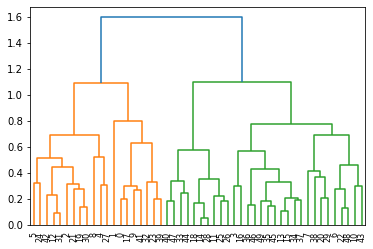

In [131]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [132]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [133]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [134]:
df['h_clusterid']=hc.labels_

In [135]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [136]:
Clusters

,Clusters
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,1
8,2
9,0


In [137]:
data=pd.read_csv("EastWestAirlines.csv")

In [138]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [139]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [140]:
# Normalized data frame (considering the numerical part of data)
df1_norm = norm_func(df1.iloc[0:50])

In [141]:
df1=data.drop('cc3_miles',axis=1)

In [142]:
df1_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.042071,0.000000,0.00,0.0,0.002848,0.023256,0.000000,0.000000,0.124060,0.0
1,0.020408,0.027653,0.000000,0.00,0.0,0.003519,0.046512,0.000000,0.000000,0.093985,0.0
2,0.040816,0.063475,0.000000,0.00,0.0,0.067474,0.093023,0.000000,0.000000,0.156015,0.0
3,0.061224,0.020414,0.000000,0.00,0.0,0.008183,0.023256,0.000000,0.000000,0.078947,0.0
4,0.081633,0.154850,0.000000,0.75,0.0,0.708616,0.604651,0.539481,0.333333,0.062970,1.0
5,0.102041,0.023078,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.069549,0.0
6,0.122449,0.134050,0.000000,0.50,0.0,0.449750,0.581395,0.000000,0.000000,0.118421,0.0
7,0.142857,0.030265,0.000000,0.00,0.0,0.085918,0.093023,0.064935,0.083333,0.065789,1.0
8,0.163265,0.714217,0.000000,0.50,1.0,0.028688,1.000000,1.000000,1.000000,0.075188,1.0
9,0.183673,0.166366,0.000000,0.50,0.0,0.465199,0.651163,0.298701,0.250000,0.059211,1.0


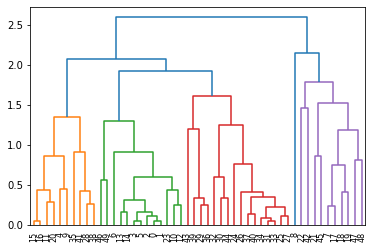

In [143]:
dendrogram = sch.dendrogram(sch.linkage(df1_norm, method='complete'))

In [144]:
# create clusters
hc1= AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [145]:
hc1

AgglomerativeClustering(linkage='single', n_clusters=4)

In [146]:
# save clusters for chart
y_hc1 = hc.fit_predict(df1_norm)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])

In [147]:
y_hc1

array([0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [149]:
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,3
9,0
